In [1]:
import pandas as pd

In [20]:
df_sub = pd.read_csv('attribute_definition_top25L2_filtered_augmented_01162023.csv')

In [21]:
df_sub

,category,attribute_field,category_attributevalue,description,augment,usage,L2
0,Cellphones & Telecommunications > Mobile Phone...,Alpha Size,"['10XL', '2XL', '2XS', '3XL', '4XL', '5XL', '6...",Specification of item size on an alpha-numeric...,False,required,Cellphones & Telecommunications > Mobile Phone...
1,Cellphones & Telecommunications > Mobile Phone...,Body Closure,"['Adjustable', 'Backstrap', 'Belted', 'Buckle'...",Specification of how item is secured around th...,False,recommended,Cellphones & Telecommunications > Mobile Phone...
2,Cellphones & Telecommunications > Mobile Phone...,Brand,"['Acer', 'Agent 18', 'Amzer', 'Arkon', 'Belkin...",Specifies the brand or developer of the item. ...,False,optional,Cellphones & Telecommunications > Mobile Phone...
3,Cellphones & Telecommunications > Mobile Phone...,Certifications,"['Bluetooth', 'DVI', 'Dark Sky', 'DisplayPort'...",Specifies all relevant certifications met for ...,False,optional,Cellphones & Telecommunications > Mobile Phone...
4,Cellphones & Telecommunications > Mobile Phone...,Item Condition,"['As-Is/For Parts', 'New', 'Refurbished - Acce...",Specifies the condition of the item based on s...,False,required,Cellphones & Telecommunications > Mobile Phone...
...,...,...,...,...,...,...,...
12389,Sports > Sneakers > Wrestling Shoes,Size,"['0', '0 Months', '0.5', '1', '1.5', '10', '10...",Specifies the item size. Entered values that a...,False,recommended,Sports > Sneakers
12390,Sports > Sneakers > Wrestling Shoes,Sport or Activity Type,"['Airsoft', 'Alpine Skiing', 'Archery', 'Auto ...",Specifies the name of the sport or activity th...,False,recommended,Sports > Sneakers
12391,Sports > Sneakers > Wrestling Shoes,Strap Type,"['Adjustable Strap', 'Ankle Strap', 'Ankle Wra...",Specifies the best desrcibe of the item strap....,False,recommended,Sports > Sneakers
12392,Sports > Sneakers > Wrestling Shoes,Styles,"['Almond Toe', 'Aluminum Toe', 'Bicycle Toe', ...",Specifies the general style of the item. Enter...,False,recommended,Sports > Sneakers


In [2]:
df = pd.read_csv('Initial Attribute Definition for First Release - UPDATED SHEET .csv')

In [7]:
len(df)

31305

In [5]:
len(set(df['attribute_field']))

653

In [16]:
attr_name_val_tuples = []
for k, i in zip(df['attribute_field'].tolist(), df['category_attributevalue'].apply(eval).tolist()):
    for j in i:
        if isinstance(j, str):
            attr_name_val_tuples.append((k, j))

In [17]:
len(attr_name_val_tuples), len(set(attr_name_val_tuples))

(1021011, 10966)

In [19]:
len(set(attr_name_val_tuples)) / len(set(df.category))

4.125658389766742

In [27]:
len_cat_all = len(set(df['category']))

In [32]:
df_attr_importance = df.groupby('attribute_field').agg({
  'category': lambda x: len(set([i for i in x])) / len_cat_all
}).reset_index()

In [33]:
df_attr_importance

,attribute_field,category
0,3D Image Support,0.000376
1,3D Technology,0.001505
2,Absorption,0.003010
3,Adaptive Sync,0.000752
4,Additional Accessories,0.000752
...,...,...
648,Width,0.004891
649,Wireless Communication Types,0.014673
650,Wireless Speaker Pairing,0.000376
651,Write Speed,0.001129


In [35]:
sub_attrs = set(df_sub.attribute_field)

In [44]:
covered_attrs = df_attr_importance[df_attr_importance.attribute_field.apply(lambda x: x in sub_attrs)]

In [37]:
leftover_attrs = df_attr_importance[df_attr_importance.attribute_field.apply(lambda x: x not in sub_attrs)]

<AxesSubplot: ylabel='Frequency'>

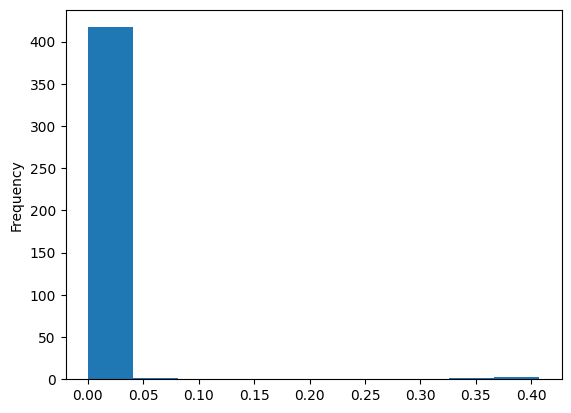

In [41]:
leftover_attrs['category'].plot.hist()

In [43]:
leftover_attrs[leftover_attrs['category'] > .3]

,attribute_field,category
299,Item Height (Include Unit of Measure),0.391648
301,Item Length (Include Unit of Measure),0.407073
307,Item Width (Include Unit of Measure),0.407073
369,Model or Model Number,0.360798


<AxesSubplot: ylabel='Frequency'>

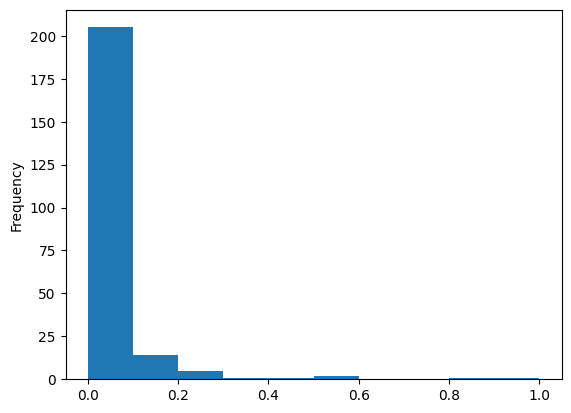

In [46]:
covered_attrs['category'].plot.hist()

In [47]:
covered_attrs[covered_attrs['category'] > .3]

,attribute_field,category
13,Alpha Size,0.868322
65,Brand Name,0.526336
297,Item Features,0.414221
334,Materials,0.568849
482,Primary Color,1.000000
575,Styles,0.313017
